In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [14]:
mbti_df=pd.read_csv('/content/MBTI.csv')
mbti_df

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ
...,...,...
106062,stay frustrate world life want take long nap w...,INFP
106063,fizzle around time mention sure mistake thing ...,INFP
106064,schedule modify hey w intp strong wing underst...,INFP
106065,enfj since january busy schedule able spend li...,INFP


In [15]:
mbti_df['ei_type'] = mbti_df['type'].apply(lambda x: 1 if 'I' in x else 0)
mbti_df

,posts,type,ei_type
0,know intj tool use interaction people excuse a...,INTJ,1
1,rap music ehh opp yeah know valid well know fa...,INTJ,1
2,preferably p hd low except wew lad video p min...,INTJ,1
3,drink like wish could drink red wine give head...,INTJ,1
4,space program ah bad deal meing freelance max ...,INTJ,1
...,...,...,...
106062,stay frustrate world life want take long nap w...,INFP,1
106063,fizzle around time mention sure mistake thing ...,INFP,1
106064,schedule modify hey w intp strong wing underst...,INFP,1
106065,enfj since january busy schedule able spend li...,INFP,1


In [16]:
mbti_df['ei_type'].value_counts()
# E: 0, I:1

,count
ei_type,
1,80677
0,25390


In [17]:
mbti_df['posts']=mbti_df['posts'].str.replace(' ',',')
mbti_df.head()

,posts,type,ei_type
0,"know,intj,tool,use,interaction,people,excuse,a...",INTJ,1
1,"rap,music,ehh,opp,yeah,know,valid,well,know,fa...",INTJ,1
2,"preferably,p,hd,low,except,wew,lad,video,p,min...",INTJ,1
3,"drink,like,wish,could,drink,red,wine,give,head...",INTJ,1
4,"space,program,ah,bad,deal,meing,freelance,max,...",INTJ,1


In [18]:
i_df=mbti_df[mbti_df['ei_type']==1]
i_df.head()

,posts,type,ei_type
0,"know,intj,tool,use,interaction,people,excuse,a...",INTJ,1
1,"rap,music,ehh,opp,yeah,know,valid,well,know,fa...",INTJ,1
2,"preferably,p,hd,low,except,wew,lad,video,p,min...",INTJ,1
3,"drink,like,wish,could,drink,red,wine,give,head...",INTJ,1
4,"space,program,ah,bad,deal,meing,freelance,max,...",INTJ,1


In [19]:
i_word_list=i_df['posts'].to_list()

In [20]:
i_dict={}
for word_list in i_word_list:
  for word in word_list.split(','):
    if word in i_dict:
      i_dict[word]+=1
    else:
      i_dict[word]=1

In [21]:
i_word_count=Counter(i_dict)
i_word_count.most_common(100)

[('like', 530221),
 ('think', 452822),
 ('people', 423184),
 ('get', 402275),
 ('thing', 313858),
 ('make', 307423),
 ('feel', 289824),
 ('know', 288849),
 ('one', 281127),
 ('go', 278749),
 ('time', 274580),
 ('say', 266082),
 ('good', 260348),
 ('would', 255411),
 ('really', 246889),
 ('want', 219243),
 ('way', 202829),
 ('see', 179938),
 ('work', 177597),
 ('something', 177217),
 ('much', 176733),
 ('also', 175983),
 ('try', 168907),
 ('find', 163138),
 ('take', 161272),
 ('even', 159608),
 ('type', 153061),
 ('well', 146517),
 ('need', 144440),
 ('friend', 144108),
 ('lot', 142047),
 ('use', 138517),
 ('life', 132383),
 ('someone', 129627),
 ('love', 127448),
 ('mean', 125799),
 ('come', 121858),
 ('could', 119560),
 ('look', 118062),
 ('talk', 116040),
 ('person', 112885),
 ('though', 112513),
 ('give', 110151),
 ('always', 109009),
 ('never', 106244),
 ('interest', 104787),
 ('seem', 102659),
 ('understand', 102244),
 ('right', 101239),
 ('year', 100323),
 ('actually', 99966),
 (

In [22]:
len(i_dict)

199818

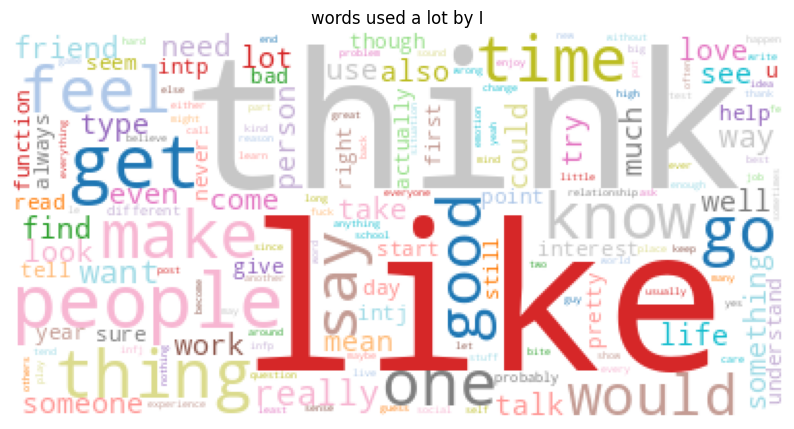

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color='white',colormap='tab20').generate_from_frequencies(i_dict))
plt.title('words used a lot by I')
plt.axis('off')
plt.show()

In [24]:
e_df=mbti_df[mbti_df['ei_type']==0]

e_word_list=e_df['posts'].to_list()

e_dict={}
for word_list in e_word_list:
  for word in word_list.split(','):
    if word in e_dict:
      e_dict[word]+=1
    else:
      e_dict[word]=1

print(len(e_dict))

128314


In [25]:
e_word_count=Counter(e_dict)
e_word_count.most_common(100)

[('like', 167945),
 ('think', 143139),
 ('get', 130822),
 ('people', 130762),
 ('make', 98530),
 ('thing', 92679),
 ('know', 90833),
 ('one', 88467),
 ('go', 85085),
 ('say', 84388),
 ('feel', 83446),
 ('good', 80975),
 ('would', 79886),
 ('time', 78116),
 ('really', 76936),
 ('want', 68648),
 ('way', 61740),
 ('see', 57977),
 ('type', 56231),
 ('also', 54671),
 ('work', 53372),
 ('much', 52808),
 ('try', 50368),
 ('take', 50012),
 ('something', 49437),
 ('well', 47584),
 ('even', 47121),
 ('friend', 46394),
 ('find', 46334),
 ('lot', 44625),
 ('need', 44373),
 ('use', 44006),
 ('love', 42831),
 ('mean', 40113),
 ('someone', 38925),
 ('come', 37732),
 ('look', 37167),
 ('life', 36767),
 ('talk', 36338),
 ('could', 36039),
 ('though', 34680),
 ('give', 34502),
 ('entp', 33420),
 ('person', 33387),
 ('right', 33358),
 ('always', 33247),
 ('u', 32313),
 ('actually', 31532),
 ('seem', 30960),
 ('function', 30348),
 ('never', 30293),
 ('interest', 30163),
 ('tell', 29830),
 ('understand', 2

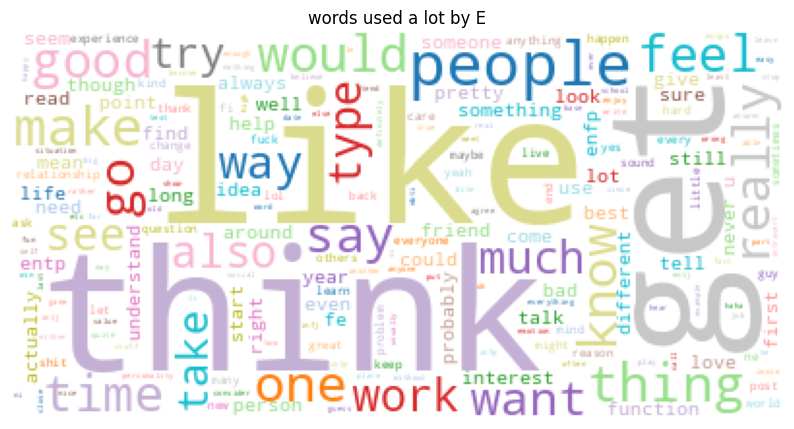

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color='white',colormap='tab20').generate_from_frequencies(e_dict))
plt.title('words used a lot by E')
plt.axis('off')
plt.show()

In [27]:
only_i=set(i_dict.keys())-set(e_dict.keys())
only_i

{'outube',
 'hindsite',
 'ᵒᵛᵉʳ',
 'henc',
 'overabundant',
 'robothood',
 'distarous',
 'reaxxionary',
 'nobias',
 'sabastian',
 'quintisential',
 'hend',
 'plzerino',
 'obout',
 'surasshu',
 'abstractable',
 'yetti',
 'wolfyyyy',
 'pelleas',
 'bodysnatched',
 'meloni',
 'snowflakiness',
 'overwhleming',
 'fuuuuuuuuu',
 'determinsm',
 'definitevly',
 'ideaistic',
 'ᴏɴ',
 'cabeza',
 'επίσεις',
 'laughted',
 'antisocially',
 'språk',
 'uniformitarian',
 'mentionthat',
 'chaoting',
 'skepticized',
 'elderscrolls',
 'kipper',
 'neeeeerrrrd',
 'chestburster',
 'ewisott',
 'metaplanar',
 'wonderbot',
 'doerr',
 'lorrie',
 'iset',
 'airfoil',
 'ashiviskas',
 'plottig',
 'budoir',
 'ohlizzie',
 'identty',
 'fuckhashtags',
 'dreamjob',
 'spiralat',
 'belials',
 'clrearly',
 'musicstreamer',
 'ajays',
 'modły',
 'blystone',
 'shadyness',
 'bytchin',
 'suntanning',
 'microscopist',
 'cooccurrrence',
 'patol',
 'shrinkology',
 'spel',
 'intentively',
 'usfw',
 'porum',
 'ompromising',
 'moralfags'

In [28]:
len(only_i)

128367

In [29]:
only_i_count={}
for word in only_i:
  only_i_count[word]=i_dict[word]

only_i_count

{'outube': 1,
 'hindsite': 1,
 'ᵒᵛᵉʳ': 1,
 'henc': 1,
 'overabundant': 2,
 'robothood': 7,
 'distarous': 2,
 'reaxxionary': 1,
 'nobias': 1,
 'sabastian': 1,
 'quintisential': 1,
 'hend': 2,
 'plzerino': 1,
 'obout': 3,
 'surasshu': 1,
 'abstractable': 1,
 'yetti': 1,
 'wolfyyyy': 1,
 'pelleas': 1,
 'bodysnatched': 1,
 'meloni': 1,
 'snowflakiness': 2,
 'overwhleming': 3,
 'fuuuuuuuuu': 1,
 'determinsm': 1,
 'definitevly': 1,
 'ideaistic': 1,
 'ᴏɴ': 1,
 'cabeza': 1,
 'επίσεις': 1,
 'laughted': 1,
 'antisocially': 1,
 'språk': 2,
 'uniformitarian': 1,
 'mentionthat': 1,
 'chaoting': 1,
 'skepticized': 1,
 'elderscrolls': 5,
 'kipper': 4,
 'neeeeerrrrd': 1,
 'chestburster': 3,
 'ewisott': 4,
 'metaplanar': 3,
 'wonderbot': 1,
 'doerr': 3,
 'lorrie': 1,
 'iset': 1,
 'airfoil': 5,
 'ashiviskas': 1,
 'plottig': 1,
 'budoir': 1,
 'ohlizzie': 1,
 'identty': 1,
 'fuckhashtags': 1,
 'dreamjob': 1,
 'spiralat': 1,
 'belials': 1,
 'clrearly': 1,
 'musicstreamer': 1,
 'ajays': 1,
 'modły': 2,
 'bl

In [36]:
only_i_count=Counter(only_i_count)
only_i_count.most_common(5)

[('socjus', 289),
 ('kotakuinaction', 220),
 ('eitheir', 137),
 ('naturalism', 87),
 ('certained', 83)]

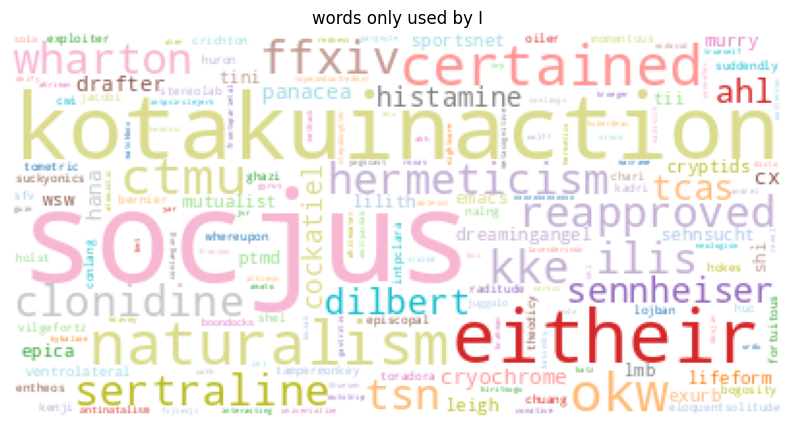

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color='white',colormap='tab20').generate_from_frequencies(only_i_count))
plt.title('words only used by I')
plt.axis('off')
plt.show()

In [32]:
only_e=set(e_dict.keys())-set(i_dict.keys())
len(only_e)

56863

In [33]:
only_e_count={}
for word in only_e:
  only_e_count[word]=e_dict[word]

only_e_count

{'situationen': 5,
 'defog': 2,
 'naigio': 1,
 'danielson': 4,
 'samfunds': 2,
 'urslevs': 1,
 'skletal': 1,
 'bwaaaaaaaaaaaaaa': 1,
 'neffies': 2,
 'vigny': 1,
 'santissima': 2,
 'ballplay': 1,
 'phia': 1,
 'devilds': 1,
 'winstonson': 1,
 'redskull': 1,
 'gået': 8,
 'peeeace': 1,
 'doiley': 1,
 'cewek': 2,
 'bentar': 4,
 'slowbirth': 1,
 'jefit': 1,
 'clon': 1,
 'suprice': 1,
 'applivibility': 1,
 'chewable': 1,
 'treatened': 1,
 'superfreak': 1,
 'rouseff': 1,
 'wuff': 4,
 'xohwxrg': 1,
 'sodara': 2,
 'additcting': 1,
 'illogcal': 1,
 'valied': 1,
 'yaddles': 1,
 'heirat': 1,
 'cogintive': 1,
 'funcrions': 1,
 'appologice': 1,
 'validatenewloginusingbcrypt': 1,
 'sekedar': 6,
 'sandia': 1,
 'pokeyman': 2,
 'dividence': 3,
 'eeeeeeexcellent': 1,
 'shotlived': 1,
 'sammamish': 1,
 'bukittinggi': 2,
 'gruppe': 8,
 'aale': 1,
 'kozaczka': 1,
 'magnora': 1,
 'preeeeetttttttty': 1,
 'cakkkkeee': 1,
 'darjeling': 1,
 'chzech': 1,
 'leaguer': 1,
 'ədˈmī': 1,
 'subjecttive': 1,
 'universitet

In [39]:
only_e_count=Counter(only_e_count)
only_e_count.most_common(5)

[('topps', 382), ('kalo', 292), ('dups', 236), ('nggak', 186), ('selv', 168)]

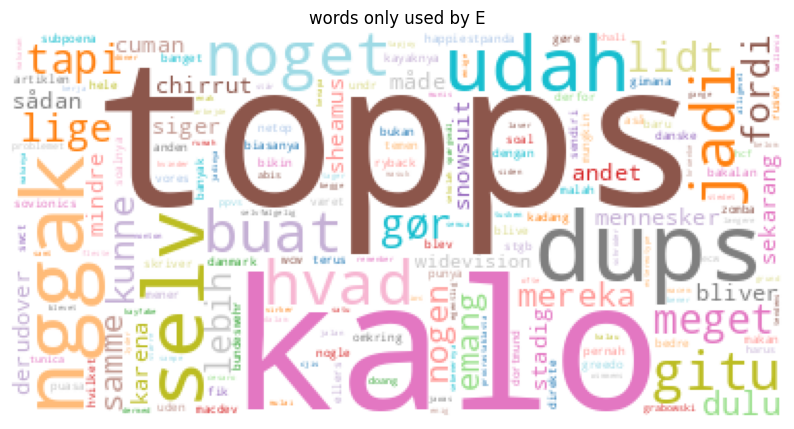

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud(background_color='white',colormap='tab20').generate_from_frequencies(only_e_count))
plt.title('words only used by E')
plt.axis('off')
plt.show()